In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Conv2D,Dropout
import pandas as pd
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Excel dosyasını oku
veri_seti_1 = pd.read_excel('/content/CFTR_final (1).xlsx')
# Sütun isimlerini yazdır
#print(veri_seti_1.columns)

FileNotFoundError: [Errno 2] No such file or directory: '/content/CFTR_final (1).xlsx'

In [ ]:
X = veri_seti_1.iloc[:, :39]
y = veri_seti_1.iloc[:, -5:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,shuffle=True)

In [ ]:
model3_2 = Sequential([
    layers.Reshape((39, 1), input_shape=(39,)),

    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(5, activation='softmax')
])

In [ ]:
learning_rate = 0.000001
optimizer = Adam(learning_rate=learning_rate)

model3_2.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
history3_2=model3_2.fit(X_train, y_train, validation_split=0.1,epochs=100, batch_size=512)

Epoch 1/100
10/10 [==============================] - 5s 318ms/step - loss: 0.1301 - accuracy: 0.0234 - val_loss: 0.1302 - val_accuracy: 0.0214
Epoch 2/100
10/10 [==============================] - 5s 484ms/step - loss: 0.1300 - accuracy: 0.0273 - val_loss: 0.1302 - val_accuracy: 0.0214
Epoch 3/100
10/10 [==============================] - 3s 298ms/step - loss: 0.1300 - accuracy: 0.0323 - val_loss: 0.1302 - val_accuracy: 0.0253
Epoch 4/100
10/10 [==============================] - 3s 289ms/step - loss: 0.1300 - accuracy: 0.0392 - val_loss: 0.1301 - val_accuracy: 0.0253
Epoch 5/100
10/10 [==============================] - 3s 285ms/step - loss: 0.1299 - accuracy: 0.0377 - val_loss: 0.1301 - val_accuracy: 0.0253
Epoch 6/100
10/10 [==============================] - 4s 398ms/step - loss: 0.1299 - accuracy: 0.0458 - val_loss: 0.1301 - val_accuracy: 0.0253
Epoch 7/100
10/10 [==============================] - 4s 339ms/step - loss: 0.1299 - accuracy: 0.0458 - val_loss: 0.1300 - val_accuracy: 0.0253

In [ ]:
model3_2.evaluate(X_test, y_test)

41/41 [==============================] - 0s 9ms/step - loss: 0.1257 - accuracy: 0.9041


[0.125682070851326, 0.904056191444397]

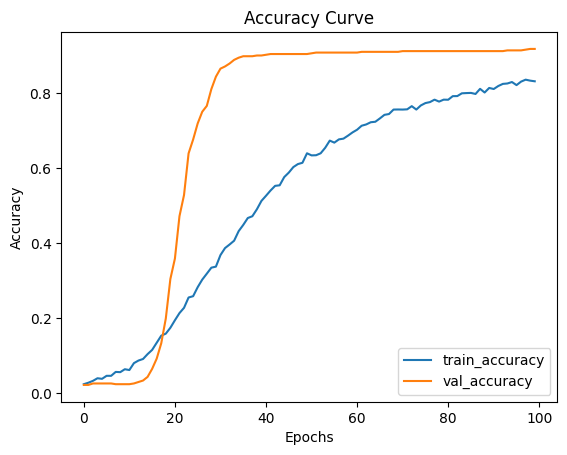

In [ ]:
plt.plot(history3_2.history['accuracy'],label='train_accuracy')
plt.plot(history3_2.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

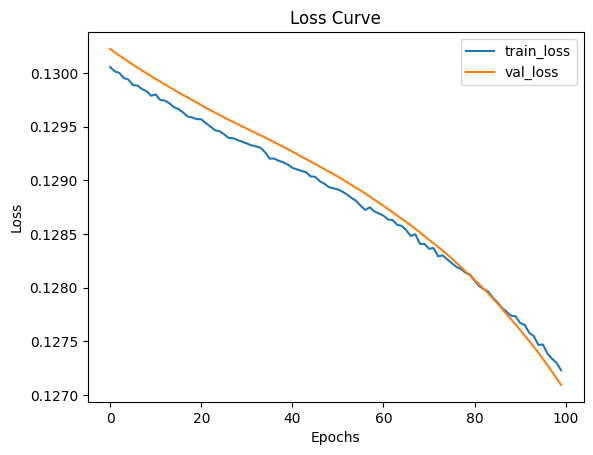

In [ ]:
plt.plot(history3_2.history['loss'],label='train_loss')
plt.plot(history3_2.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

In [ ]:
learning_rate = 0.000001
optimizer = Adam(learning_rate=learning_rate)

model3_2.compile(optimizer=optimizer, loss='mse', metrics=['accuracy','precision', 'recall', 'f1'])
history3_2=model3_2.fit(X_train, y_train, validation_split=0.1,epochs=100, batch_size=512)

Epoch 1/100
10/10 [==============================] - 7s 516ms/step - loss: 0.1298 - accuracy: 0.0466 - val_loss: 0.1300 - val_accuracy: 0.0526
Epoch 2/100
10/10 [==============================] - 3s 303ms/step - loss: 0.1297 - accuracy: 0.0475 - val_loss: 0.1300 - val_accuracy: 0.0526
Epoch 3/100
10/10 [==============================] - 3s 312ms/step - loss: 0.1296 - accuracy: 0.0460 - val_loss: 0.1299 - val_accuracy: 0.0526
Epoch 4/100
10/10 [==============================] - 3s 303ms/step - loss: 0.1296 - accuracy: 0.0490 - val_loss: 0.1299 - val_accuracy: 0.0526
Epoch 5/100
10/10 [==============================] - 5s 476ms/step - loss: 0.1296 - accuracy: 0.0544 - val_loss: 0.1298 - val_accuracy: 0.0507
Epoch 6/100
10/10 [==============================] - 3s 299ms/step - loss: 0.1295 - accuracy: 0.0635 - val_loss: 0.1298 - val_accuracy: 0.0507
Epoch 7/100
10/10 [==============================] - 3s 300ms/step - loss: 0.1295 - accuracy: 0.0611 - val_loss: 0.1297 - val_accuracy: 0.0526

In [ ]:
model3_2.evaluate(X_test, y_test)

41/41 [==============================] - 1s 13ms/step - loss: 0.1196 - accuracy: 0.9017


[0.11958637088537216, 0.9017160534858704]

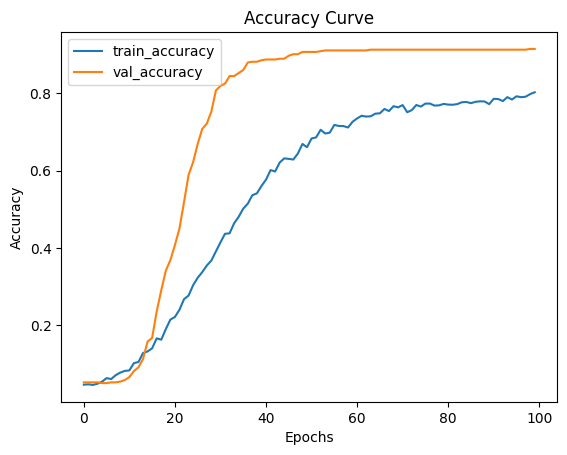

In [ ]:
plt.plot(history3_2.history['accuracy'],label='train_accuracy')
plt.plot(history3_2.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

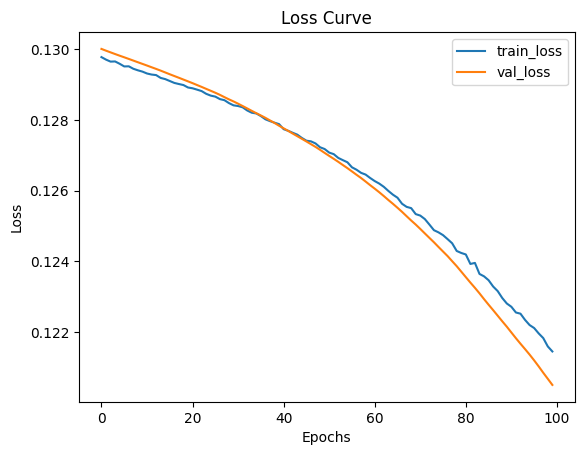

In [ ]:
plt.plot(history3_2.history['loss'],label='train_loss')
plt.plot(history3_2.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

Model3_1

In [ ]:
model3_1 = Sequential([
    layers.Reshape((39, 1), input_shape=(39,)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

In [ ]:
learning_rate = 0.000001
optimizer = Adam(learning_rate=learning_rate)

model3_1.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
history3_1=model3_1.fit(X_train, y_train, validation_split=0.1,epochs=100, batch_size=512)

Epoch 1/100
10/10 [==============================] - 5s 244ms/step - loss: 0.1305 - accuracy: 0.0384 - val_loss: 0.1306 - val_accuracy: 0.0175
Epoch 2/100
10/10 [==============================] - 2s 205ms/step - loss: 0.1304 - accuracy: 0.0418 - val_loss: 0.1305 - val_accuracy: 0.0234
Epoch 3/100
10/10 [==============================] - 2s 213ms/step - loss: 0.1304 - accuracy: 0.0434 - val_loss: 0.1304 - val_accuracy: 0.0234
Epoch 4/100
10/10 [==============================] - 3s 336ms/step - loss: 0.1302 - accuracy: 0.0486 - val_loss: 0.1304 - val_accuracy: 0.0253
Epoch 5/100
10/10 [==============================] - 3s 254ms/step - loss: 0.1302 - accuracy: 0.0546 - val_loss: 0.1303 - val_accuracy: 0.0273
Epoch 6/100
10/10 [==============================] - 2s 209ms/step - loss: 0.1302 - accuracy: 0.0566 - val_loss: 0.1303 - val_accuracy: 0.0292
Epoch 7/100
10/10 [==============================] - 2s 219ms/step - loss: 0.1301 - accuracy: 0.0661 - val_loss: 0.1302 - val_accuracy: 0.0331

In [ ]:
model3_1.evaluate(X_test, y_test)

41/41 [==============================] - 0s 8ms/step - loss: 0.1209 - accuracy: 0.9103


[0.12088600546121597, 0.9102964401245117]

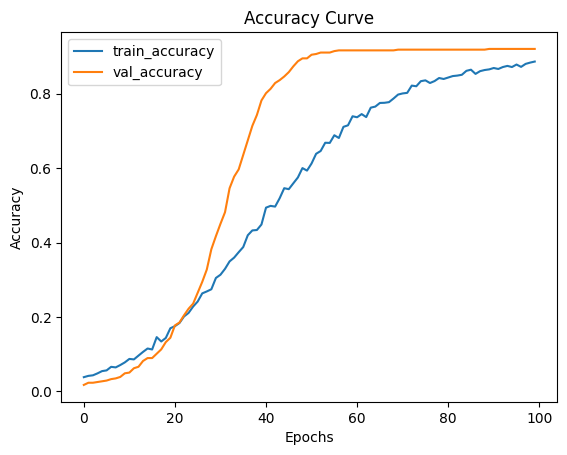

In [ ]:
plt.plot(history3_1.history['accuracy'],label='train_accuracy')
plt.plot(history3_1.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

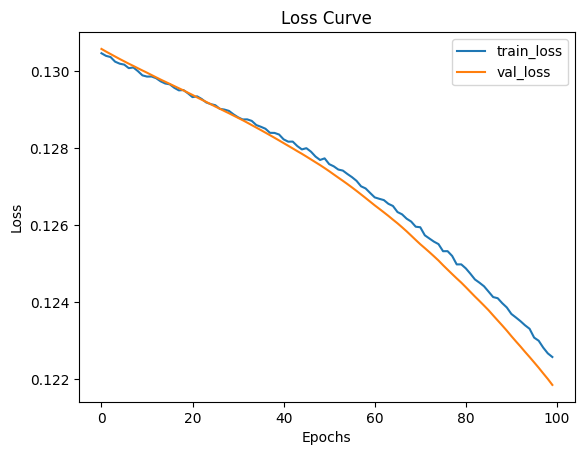

In [ ]:
plt.plot(history3_1.history['loss'],label='train_loss')
plt.plot(history3_1.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()